<H1>Numerical Integration of Particle Orbits in Newtonian Gravity</H1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,pi

In [2]:
# Initialize some generaic constants:
T = 1.
N = 100
h = T/N

<H2>Theoretical Bases</H2>

Some references:
<BR>
- <A href="leapfrog.pdf">The leapfrog method and other symplectic algorithms for integrating Newton's laws of motion</A>, by P. Young
<BR>
- <A href="http://www.artcompsci.org/kali/vol/two_body_problem_2/title.html">The 2-body Problem: Higher Order Integrators</A>, by P. Hut and J. Makino.

<H2>Newtonian Gravity</H2>

In [3]:
def F(x,y,z=0.):
    d=np.sqrt(x**2+y**2+z**2)
    Fx = -GM*x/d**3
    Fy = -GM*y/d**3
    Fz = -GM*z/d**3
    return Fx, Fy, Fz

def Pot(x,y,z=0.):
    d=np.sqrt(x**2+y**2+z**2)
    return -GM/d

<H2>Euler and Euler-Cromer Algorithms</H2>

For solving the equation of motion:
$$
\frac{dx}{dt} = v
\\
\frac{dv}{dt} = F(x)
$$

<H3>Euler (or forward Euler) algorithm</H3>
$$
x_{n+1} = x_n + hv_n
\\
v_{n+1} = v_n +hF(x_n)
$$
Comparison to the Taylor series shows the error is ${\cal O}(h^2)$ and thus integration over a time $T$ requiring $T/h$ steps gives an error ${\cal O}(h^2) \cdot (T/h) = {\cal O}(h)$, <I>Euler is a first order method</I>.

<H3>Euler-Cromer (or backward Euler) algorithm</H3>
$$
x_{n+1} = x_n + hv_n
\\
v_{n+1} = v_n +hF(x_{n+1})
$$
Comparison to the Taylor series shows the error is ${\cal O}(h^2)$ and thus integration over a time $T$ requiring $T/h$ steps gives an error ${\cal O}(h^2) \cdot (T/h) = {\cal O}(h)$, <I>Euler-Cromer is a first order method</I> but being <I>implicit</I> (because of the use of $x_{n+1}$ in the evaluation of $F(x)$) it is more stable than Euler.

In [4]:
# Forward Euler:
def Euler_1(x0,vx0,y0,vy0,z0,vz0,N=N,h=h):
    x = np.zeros((3,N))
    v = np.zeros((3,N))
    x[:,0] = [x0,y0,z0]
    v[:,0] = [vx0,vy0,vz0]
    for i in range(0,N-1):
        x[:,i+1] = x[:,i]  + h * v[:,i]
        FF  = np.array(F(x[0,i],x[1,i],x[2,i]))
        v[:,i+1] = v[:,i] + h * FF[:]
    return x[0,:],v[0,:],x[1,:],v[1,:],x[2,:],v[2,:]

In [5]:
# Backward Euler:
def Euler_2(x0,vx0,y0,vy0,z0,vz0,N=N,h=h):
    x = np.zeros((3,N))
    v = np.zeros((3,N))
    x[:,0] = [x0,y0,z0]
    v[:,0] = [vx0,vy0,vz0]
    for i in range(0,N-1):
        x[:,i+1] = x[:,i]  + h * v[:,i]
        FF  = np.array(F(x[0,i+1],x[1,i+1],x[2,i+1]))
        v[:,i+1] = v[:,i] + h * FF[:]
    return x[0,:],v[0,:],x[1,:],v[1,:],x[2,:],v[2,:]

<H2>Verlet Algorithm (or Mid-Point or Second-Order Runge-Kutta algorithm)</H2>

De acuerdo con lo que vimos en clase (y se sacó del PDF de Leap-frog y Verlet), este es el algoritmo para el Verlet de velocidades:

$$v_{n+1/2} = v_n + \frac{1}{2}hF(x_n)$$

$$x_{n+1} = x_n + hv_{n+1/2}$$

Aquí nos interesaría resolver la dinámica newtoniana del problema gravitacional:

$$\ddot{\vec{r}}=-\frac{GM\vec{r}}{\vert\vec{r}\vert^3} \; ,$$ 

es decir:

$$\ddot{x}=-\frac{GMx}{\vert\vec{r}\vert^3}$$

$$\ddot{y}=-\frac{GMy}{\vert\vec{r}\vert^3}$$

In [36]:
def Verlet_1(x0,vx0,y0,vy0,z0,vz0,N=N,h=h):
    # This is the "Velocity Verlet" algorithm:
    x = np.zeros((3,N))
    v = np.zeros((3,N))
    x[:,0] = [x0,y0,z0]
    v[:,0] = [vx0,vy0,vz0]
    FF  = np.array(F(x[0,0],x[1,0],x[2,0]))
    for i in range(0,N-1):
        # These are the v[i+1/2]:
        # they use the forces from previous step, i.e., at F(x_i):
        V = v[:,i] + 0.5 * h * FF
        x[:,i+1] = x[:,i] + h * V
        FF  = np.array(F(x[0,i+1],x[1,i+1],x[2,i+1]))
        v[:,i+1] = V + 0.5 * h * FF[:] 
    return x[0,:],v[0,:],x[1,:],v[1,:],x[2,:],v[2,:]

<H2>4<SUP>th</SUP> Order Runge-Kutta Algorithm</H2>

$$
x^{(0)} = x_i
\\
F^{(0)} = F\left(x^{(0)}\right)
\\
x^{(1/2)} = x_i + \frac{\Delta t}{2} v_i + \frac{1}{2} \left(\frac{\Delta t}{2}\right)^2 F^0
\\
F^{(1/2)} = F\left(x^{(1/2)}\right)
\\
x^{(1)} = x_i + \Delta t \, v_i + \frac{1}{2} (\Delta t)^2 F^1
\\
F^{(1)} = F\left(x^{(1)}\right)
$$
and
$$
x_{i+1} = x_i + \Delta t \, v_i + \frac{1}{2}(\Delta t)^2 \left(\frac{1}{3}F^{(0)} + \frac{2}{3}F^{(1/2)} \right)
\\
v_{i+1} = v_i + \Delta t \left(\frac{1}{6} F^{(0)} + \frac{4}{6} F^{(1/2)} + \frac{1}{6} F^{(2)}\right) 
$$

In [7]:
def RungeKutta(x0,vx0,y0,vy0,z0,vz0,N=N,h=h):
    # This is the classical "Runge-Kutta" algorithm:
    x = np.zeros((3,N))
    v = np.zeros((3,N))
    x[:,0] = [x0,y0,z0]
    v[:,0] = [vx0,vy0,vz0]
    FF  = np.array(F(x[0,0],x[1,0],x[2,0]))
    for i in range(0,N-1):
        x0 = x[:,i]
        V  = v[:,i]
        F0 = np.array(F(x0[0],x0[1],x0[2]))
        x1 = x0 + 1./2. * h*V + 1./8. * h**2*F0
        F1 = np.array(F(x1[0],x1[1],x1[2]))
        x2 = x0 + 1.0   * h*V + 1./2. * h**2*F1
        F2 = np.array(F(x2[0],x2[1],x2[2]))
        x[:,i+1] = x0 + h*V + (1./6.) * h**2*(F0+2*F1)
        v[:,i+1] = V + 1./6. * h *(F0+4.*F1+F2)
    return x[0,:],v[0,:],x[1,:],v[1,:],x[2,:],v[2,:]

<H2>4<SUP>th</SUP> Order Yoshida Algorithm</H2>

$$
x^1 = x_i + \Delta t \, c_1 \, v_i
\\
v^1 = v_i + \Delta t \, d_1 \, F(x^1)
\\
x^2 = x^1 + \Delta t \, c_2 \, v^1
\\
v^2 = v^1 + \Delta t \, d_2 \, F(x^2)
\\
x^3 = x^2 + \Delta t \, c_3 \, v^2
\\
v^3 = v^2 + \Delta t \, d_3 \, F(x^3)
\\
x^4 = x^3 + \Delta t \, c_4 \, v^3
$$
and finally:
$$
x_{i+1} = x^4
\\
v_{i+1} = v^3
$$

In [8]:
w1 = 1/(2.-np.cbrt(2.))
w0 = -np.cbrt(2.)*w1
c1, c2, c3, c4 = w1/2., w0/2.+w1/2., w0/2.+w1/2., w1/2.
d1, d2, d3 = w1, w0, w1
print('Sum of the ci =',c1+c2+c3+c4)
print('Sum of the di =',d1+d2+d3)

def Yoshida(x0,vx0,y0,vy0,z0,vz0,N=N,h=h):
    # This is the "Yoshida" algorithm:
    x = np.zeros((3,N))
    v = np.zeros((3,N))
    x[:,0] = [x0,y0,z0]
    v[:,0] = [vx0,vy0,vz0]
    FF  = np.array(F(x[0,0],x[1,0],x[2,0]))
    for i in range(0,N-1):
        x0 = x[:,i]
        v0 = v[:,i]
        x1 = x0 + c1 * h*v0
        F1 = np.array(F(x1[0],x1[1],x1[2]))
        v1 = v0 + d1 * h*F1
        x2 = x1 + c2 * h*v1
        F2 = np.array(F(x2[0],x2[1],x2[2]))
        v2 = v1 + d2 * h*F2
        x3 = x2 + c3 * h*v2
        F3 = np.array(F(x3[0],x3[1],x3[2]))
        v3 = v2 + d3 * h*F3
        x4 = x3 + c4 * h*v3
        x[:,i+1] = x4
        v[:,i+1] = v3
    return x[0,:],v[0,:],x[1,:],v[1,:],x[2,:],v[2,:]

Sum of the ci = 1.0
Sum of the di = 1.0


<H2>Define the Trajectory Class</H2>

In [9]:
import numpy as np

METHODS = [ Euler_1,         Euler_2,         Verlet_1,        \
                    Yoshida,             RungeKutta]
methods = ['Euler_1',       'Euler_2',       'Verlet_1',        \
                   'Yoshida',           'RungeKutta']
Methods = ['Forward Euler', 'Backward Euler', 'Velocity Verlet', \
                   '4th-order Yoshida', '4th-order Runge-Kutta']
        
class Trajectory():
    """A particle trajectory with all its parameters and properties nicely stored"""
    
    def __init__(self, method, x0, vx0, y0, vy0, z0, vz0, N, h):
        if method not in methods:
            print('Error: method must be one of:', methods)
            self.im         = 10000
            self.method     = ''
            self.Method     = ''
            self.METHOD     = ''
            self.r_initial  = 0
            self.v_initial  = 0
            self.N          = 0
            self.h          = 0
            self.Run        = 0
            self.comment('Error: method ' + method + ' not recognized')
        else:
            self.im         = methods.index(method)
            self.method     = methods[self.im]
            self.Method     = Methods[self.im]
            self.METHOD     = METHODS[self.im]
            self.r_initial  = np.array([x0,  y0,  z0])
            self.v_initial  = np.array([vx0, vy0, vz0])
            self.N          = N
            self.h          = h
            self.Run        = 0
            self.comment()
    
    def comment(self, Text='No comment'):
        self.Comment = Text
    
    def info(self):
        if self.Run == 1:
            print('Method used:',self.Method)
            print('Number of steps and step size =', self.N, self.h)
            print('Initial position =', self.r_initial)
            print('Initial velocity =', self.v_initial)
            print('Final position   =', [self.x[self.N-1],  self.y[self.N-1],  self.z[self.N-1]])
            print('Final velocity   =', [self.vx[self.N-1], self.vy[self.N-1], self.vz[self.N-1]])
        else:
            print('Trajectory has not yet been run !')
        
    def run(self):
        if self.im < 10000:
            #print('Let''s go !')
            self.x, self.vx, self.y, self.vy, self.z, self.vz = \
                self.METHOD(self.r_initial[0], self.v_initial[0], \
                            self.r_initial[1], self.v_initial[1], \
                            self.r_initial[2], self.v_initial[2], \
                            self.N, self.h)
            self.Run        = 1
            #print('... Done, using', self.Method)
            # Trajectory's Energy and Angular Momentum:
            self.Energy = self.energy()
            self.Spin   = self.spin()
        else:
            print('Method un-defined !')

    def energy(self):
        if self.Run == 0:
            print('Energy: first run the model !')
        else:
            Epot = np.zeros(self.N)
            Ekin = np.zeros(self.N)
            for i in range(self.N):
                Epot[i] = Pot(self.x[i], self.y[i], self.z[i])
                Ekin[i] = 0.5*(self.vx[i]**2+self.vy[i]**2+self.vz[i])
        return Epot, Ekin
    
    def spin(self):
        if self.Run == 0:
            print('Spin: first run the model !')
        else:
            Lx = np.multiply(self.y,self.vz)-np.multiply(self.z,self.vy)
            Ly = np.multiply(self.z,self.vx)-np.multiply(self.x,self.vz)
            Lz = np.multiply(self.x,self.vy)-np.multiply(self.y,self.vx)
            LL = np.sqrt(np.multiply(Lx,Lx)+np.multiply(Ly,Ly)+np.multiply(Lz,Lz))
        return Lx, Ly, Lz, LL

<H2>Compare the Various Integrators</H2>

<H3>Define the Trajectory Array</H3>

In [10]:
TR = [0,0,0,0,0,0,0,0,0,0]
for i in range(10):
    TR[i] = [0,0,0,0,0,0,0,0,0,0]
    for j in range(10):
        TR[i][j] = [0,0,0,0,0,0,0,0,0,0]
print(TR)

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 

In [11]:
# Store the Array with pickle:
import pickle
f = open('Newtonian_Orbits_TR1.pckl', 'wb')
pickle.dump(TR, f)
f.close()

In [12]:
# Read array from saved pickle file:
import pickle
f = open('Newtonian_Orbits_TR1.pckl', 'rb')
TR1 = pickle.load(f)
f.close()

<H3>Accuracy for one revolution</H3>

In [13]:
GM = 4.*pi**2
d =1.
n = 1
jn = 0

In [14]:
N, jN = 100, 0
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 100  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '  -0.6112798437281253  -1.5995698888856063   0.6524047661155952   1.2255386125688981
'Backward Euler           '   0.9944358774548794  -0.0803444942046115   0.9999944808617685   1.0000000000000002
'Velocity Verlet          '   0.9974734632388311  -0.0710693217032186   0.9999999958837315   1.0000000000000004
'4th-order Yoshida        '   0.9980217996934613  -0.0628689862958029   0.9999999999998754   1.0000000000000007
'4th-order Runge-Kutta    '   0.9980269658376433  -0.0627860415422385   1.0000000421449802   0.9999999789275104


In [15]:
N, jN = 1000, 1
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 1000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '   1.0135348470990189  -0.3638851786754468   0.9316982566604823   1.0360000049383973
'Backward Euler           '   0.9999590450010087  -0.0064588829385756   0.9999999995960767   1.0000000000000013
'Velocity Verlet          '   0.9999797378670431  -0.0063658658135927   1.0000000000000013   0.9999999999999974
'4th-order Yoshida        '   0.9999802608063144  -0.0062831518984655   0.9999999999999937   1.0000000000000033
'4th-order Runge-Kutta    '   0.9999802608584101  -0.0062831435350445   1.0000000000004279   0.9999999999997862


In [16]:
N, jN = 10000, 2
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 10000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '   1.0071617780783690  -0.0377506116401946   0.9922276067826409   1.0039089973696331
'Backward Euler           '   0.9999996037531516  -0.0006300755526203   0.9999999999999623   0.9999999999999994
'Velocity Verlet          '   0.9999998020880216  -0.0006291453644372   1.0000000000000271   0.9999999999999866
'4th-order Yoshida        '   0.9999998026079002  -0.0006283184901793   1.0000000000000053   0.9999999999999974
'4th-order Runge-Kutta    '   0.9999998026079358  -0.0006283184894059   0.9999999999999798   1.0000000000000102


In [17]:
N, jN = 100000, 3
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 100000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '   1.0007821452559542  -0.0037828073698221   0.9992116841627061   1.0003943911124638
'Backward Euler           '   0.9999999960507071  -0.0000628494233050   0.9999999999999916   1.0000000000000042
'Velocity Verlet          '   0.9999999980255061  -0.0000628401213602   1.0000000000000355   0.9999999999999822
'4th-order Yoshida        '   0.9999999980261373  -0.0000628318529895   0.9999999999999453   1.0000000000000275
'4th-order Runge-Kutta    '   0.9999999980260804  -0.0000628318531657   0.9999999999999756   1.0000000000000122


<H3>Accuracy for 10 revolutions</H3>

In [18]:
GM = 4.*pi**2
d =1.
n = 10
jn = 1

In [19]:
N, jN = 100*n, 0
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 1000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '  -0.3725779868958218   2.3996337927823790   0.3316338634476263   1.6990595582122161
'Backward Euler           '   0.9660954003754657  -0.2359892053996362   0.9999683814392303   1.0000000000000007
'Velocity Verlet          '   0.9894466570313166  -0.1449213999048855   0.9999999931706156   0.9999999999999959
'4th-order Yoshida        '   0.9979770164321434  -0.0635759126240276   0.9999999999998679   1.0000000000000044
'4th-order Runge-Kutta    '   0.9980302446318283  -0.0627277934366032   1.0000004252819610   0.9999997873590870


In [20]:
N, jN = 1000*n, 1
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 10000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '   1.4243124085567831   0.4467963942471239   0.6672070108338574   1.2242095631188545
'Backward Euler           '   0.9999443665766266  -0.0080401500036692   0.9999999994565167   1.0000000000000007
'Velocity Verlet          '   0.9999747239212694  -0.0071099883451878   0.9999999999999888   1.0000000000000038
'4th-order Yoshida        '   0.9999802603576595  -0.0062832233011231   1.0000000000000024   0.9999999999999986
'4th-order Runge-Kutta    '   0.9999802608800461  -0.0062831394809474   1.0000000000042604   0.9999999999978699


In [21]:
N, jN = 10000*n, 2
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 100000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '  -1.0535610885340454   0.2045687712180532   0.9315829116426398   1.0360686042017342
'Backward Euler           '   0.9999995904501128  -0.0006458887491823   0.9999999999999551   1.0000000000000022
'Velocity Verlet          '   0.9999997973784973  -0.0006365868622221   1.0000000000001248   0.9999999999999378
'4th-order Yoshida        '   0.9999998026078885  -0.0006283185002847   0.9999999999999710   1.0000000000000144
'4th-order Runge-Kutta    '   0.9999998026079386  -0.0006283184917953   0.9999999999999273   1.0000000000000364


In [23]:
N, jN = 100000*n, 3
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 1000000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '   0.9404667418073900  -0.3623826931645138   0.9922267525813733   1.0039094296630588
'Backward Euler           '   0.9999999960375127  -0.0000630075555466   0.9999999999999412   1.0000000000000295
'Velocity Verlet          '   0.9999999980207850  -0.0000629145343344   1.0000000000001634   0.9999999999999183
'4th-order Yoshida        '   0.9999999980260103  -0.0000628318531069   1.0000000000000606   0.9999999999999698
'4th-order Runge-Kutta    '   0.9999999980260844  -0.0000628318531987   1.0000000000000286   0.9999999999999856


<H3>Accuracy for 10'000 revolutions</H3>

In [25]:
GM = 4.*pi**2
d =1.
n = 10000
jn = 3

In [26]:
N, jN = 100*n, 0
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 1000000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '  11.6501336281610772 -101.2111222165589055   0.0150943301103951   4.4336805474351184
'Backward Euler           '   0.8515321557330108   0.4883139120309671   0.9995821784235814   0.9999999999999070
'Velocity Verlet          '   0.6207950905919022  -0.7857471471169624   0.9999972602477687   0.9999999999998175
'4th-order Yoshida        '   0.6600733218327114  -0.7512012220092364   0.9999999999998798   0.9999999999998748
'4th-order Runge-Kutta    '   0.3422663369849623   0.9391488915501730   1.0004266139024480   0.9997867612742108


In [27]:
N, jN = 1000*n, 1
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 10000000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            '  -4.5147187112952070 -13.4657181832182218   0.0747896465549851   3.6487148515139918
'Backward Euler           '  -0.1943823219236544  -0.9780207701470638   0.9999883130382319   0.9999999999999830
'Velocity Verlet          '   0.6725815253433196  -0.7400233360290822   0.9999999999954795   1.0000000000000586
'4th-order Yoshida        '   0.9999797595375849  -0.0063624298097207   1.0000000000006291   0.9999999999996856
'4th-order Runge-Kutta    '   0.9999815276298873  -0.0060774874007898   1.0000000042728248   0.9999999978635876


<H3>Accuracy for 1'000'000 revolutions</H3>

In [216]:
GM = 4.*pi**2
d =1.
n = 1000000
jn = 5

In [217]:
N, jN = 100*n, 0
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
for im in range(5):
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
for im in range(5):
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 100000000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '
'Forward Euler            ' -7806.7829470574415609 -40779.6365087782760384   0.0000162503538037   4.9847696554812506
'Backward Euler           '  -0.9798416576898820  -0.0231100996856034   0.9994957294446954   0.9999999999899234
'Velocity Verlet          '  -0.5385260273692329  -0.8438286155881376   0.9999979731940438   0.9999999999952822
'4th-order Yoshida        '  -0.9741183435209457   0.2260680292441937   0.9999999999256981   0.9999999999998875
'4th-order Runge-Kutta    '  -0.9315049257139210  -0.1747518294069741   1.0551243733157785   0.9735273844344098


In [ ]:
N, jN = 1000*n, 1
print('------------------------------------------------------- N =', N,' ----------------------------------------------------------------')

h = n/(N)
#for im in range(5):
for im in [2]:
    method = methods[im]
    TR[jn][jN][im] = Trajectory(method, d, 0., 0., sqrt(GM/d), 0., 0., N, h)
print("%15a %10a %20a %20a %20a %20a" %('Method',' ','x_f     ','y_f     ','E_f/E_i    ','L_f/L_i    '))
#for im in range(5):
for im in [2]:
    T = TR[jn][jN][im]
    T.run()
    Text = T.Method + ' '*(25-len(T.Method))
    Ei, Ef = T.Energy[0][0]+T.Energy[1][0], T.Energy[0][-1]+T.Energy[1][-1]
    Li, Lf = T.Spin[2][0], T.Spin[2][-1]
    print("%25a %20.16f %20.16f %20.16f %20.16f" \
           %(Text, T.x[-1], T.y[-1], Ef/Ei, Lf/Li))

------------------------------------------------------- N = 1000000000  ----------------------------------------------------------------
       'Method'        ' '           'x_f     '           'y_f     '        'E_f/E_i    '        'L_f/L_i    '


<H2>Check the System</H2>

In [18]:
GM = 4.*pi**2 #con unidades (UA)^3/((Msol)^2*(year))
d =1.
n = 1
N = 100
h = n/(N)
#T1 = Trajectory('RungeKutta', d, 0., 0., sqrt(GM/d), 0., 0., N, h)
T1 = Trajectory('Yoshida', d, 0., 0., sqrt(GM/d), 0., 0., N, h)

In [19]:
T1.info()
T1.Comment

Trajectory has not yet been run !


'No comment'

In [20]:
T1.run()

In [21]:
T1.comment('This is a first trial !')
#comment = T1.comment
print(T1.Comment)

This is a first trial !


In [22]:
T1.info()

Method used: 4th-order Yoshida
Number of steps and step size = 100 0.01
Initial position = [1. 0. 0.]
Initial velocity = [0.         6.28318531 0.        ]
Final position   = [0.9980217996934613, -0.06286898629580286, 0.0]
Final velocity   = [0.39501527661188673, 6.270755908427925, 0.0]


In [40]:
#print(T1.Energy[0])
#print(T1.Energy[1])
#print(np.add(T1.Energy[0],T1.Energy[1]))

In [41]:
#print(T1.Spin[0])
#print(T1.Spin[1])
#print(T1.Spin[2])
#print(T1.Spin[3])

<H2>Run It !</H2>

In [37]:
GM = 4.*pi**2 #con unidades (UA)^3/((Msol)^2*(year))
d =1.
n = 1.       # numero total de revoluciones
N = 100   # número de puntos 
h = n/(N-1)

#x,vx,y,vy,z,vz = Yoshida(d,0.,0.,1.*sqrt(GM/d),0.,0.,N,h)
#x,vx,y,vy,z,vz = RungeKutta(d,0.,0.,1.*sqrt(GM/d),0.,0.,N,h)
x,vx,y,vy,z,vz = Verlet_1(d,0.,0.,1.*sqrt(GM/d),0.,0.,N,h)
#x,vx,y,vy,z,vz = Euler_0(d,0.,0.,sqrt(GM/d),0.,0.,N,h)
#x,vx,y,vy,z,vz = Euler_2(d,0.,0.,sqrt(GM/d),0.,0.,N,h)

print(x[0],x[N-1])
print(y[0],y[N-1])
print(z[0],z[N-1])

1.0 0.9999645258437326
0.0 -0.0084232764761705
0.0 0.0


In [38]:
x1 = np.copy(x)
y1 = np.copy(y)
z1 = np.copy(z)

In [39]:
x2 = np.copy(x)
y2 = np.copy(y)
z2 = np.copy(z)

In [40]:
x3 = np.copy(x)
y3 = np.copy(y)
z3 = np.copy(z)

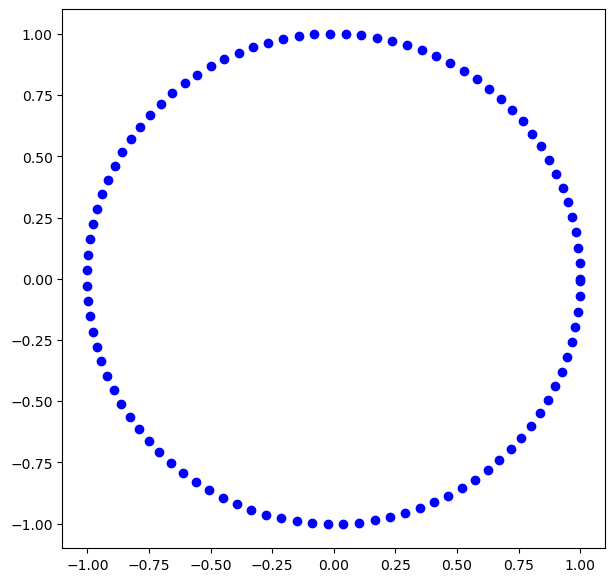

In [41]:
plt.figure(figsize=(7,7))
#plt.xlim(0.99,1.01)
#plt.ylim(-0.01,0.01)
j=1
plt.scatter(x1[::j],y1[::j], marker='o', color='blue')
plt.scatter(x2[::j],y2[::j], marker='.', s=0.01, color='red')
plt.scatter(x3[::j],y3[::j], marker='.', s=0.01, color='green')
plt.show()

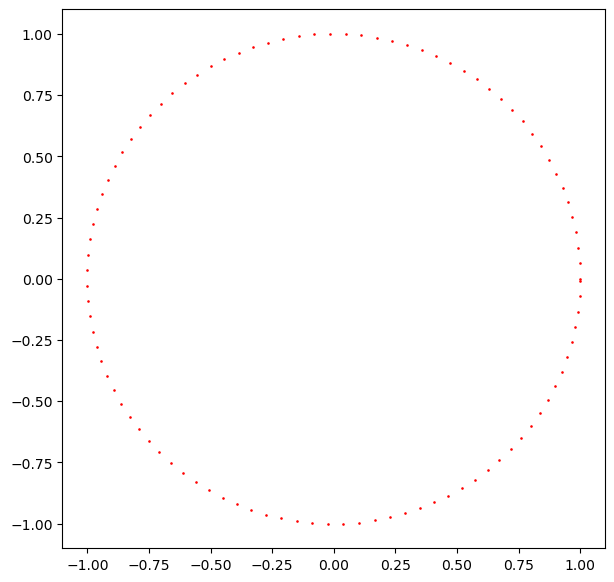

In [45]:
plt.figure(figsize=(7,7))
#plt.xlim(0.999,1.001)
#plt.ylim(-0.001,0.001)
j=10
i1=10000
i2=i1+1000
plt.scatter(x[i1:i2:j],y[i1:i2:j], s=5., color='blue')
i3=90000
i4=i3+1000
plt.scatter(x[i3:i4:j],y[i3:i4:j], s=0.1, color='red')
plt.scatter(x2,y2, s=0.75, color='red')
plt.show()

NameError: name 'Kt' is not defined

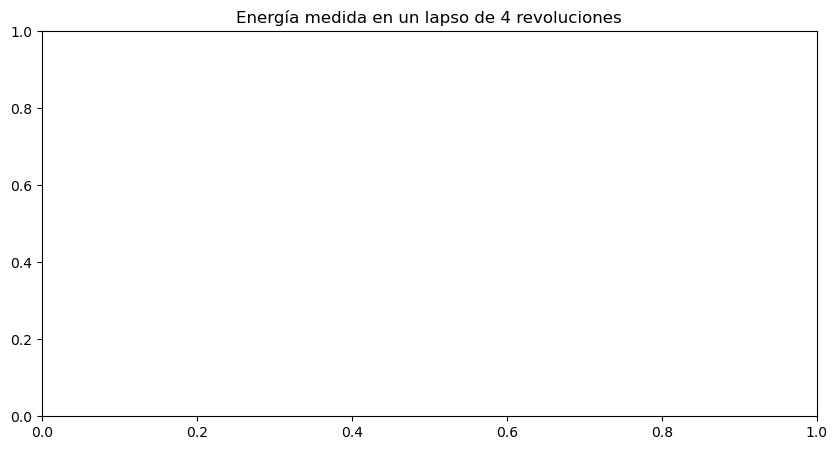

In [31]:
t = np.linspace(0,N,N)
u = []
for x in t:
    U = lambda x: -GM/d 
    u.append(U(x))

plt.figure(figsize=(10,5))
plt.title('Energía medida en un lapso de 4 revoluciones')
plt.plot(t,Kt,'.',label='Energía cinética')
plt.plot(t,u,'.',label='Energía potencial')
plt.plot(t,Kt+u,'.',label='Energía total')
plt.xlabel('Tiempo $t$ [1 año/112]')
plt.ylabel('Energía')
plt.legend()
plt.show()